In [1]:
#importing the required libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os


In [2]:
#setting the randomness 

seed = 314
tf.random.set_seed(seed)
np.random.seed(seed)

In [5]:
## deciding the path of training and the testing data

train_path = 'D:\DATASET\TRAIN/'
test_path = 'D:\DATASET\TEST/'

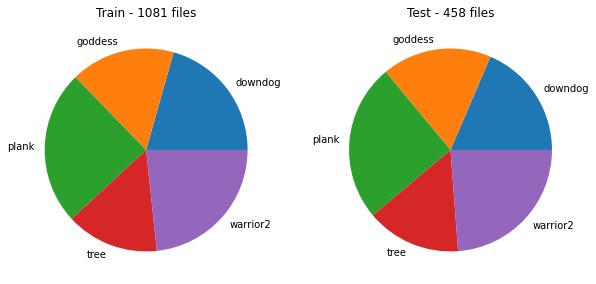

In [6]:

##creating the training and testing directory and visualizing the dataset on a pie chart of the data 
##distribution

class_names = []
train_distrib = []
test_distrib = []

# for train
for dir in os.listdir(train_path):
    class_names.append(dir) # append the folder name, the class
    number = len(os.listdir(train_path+dir+'/')) # count the files on the dir
    train_distrib.append(number) # append that number
    
# for test
for dir in os.listdir(test_path):
    #class_names.append(dir) # append the folder name, the class
    number = len(os.listdir(test_path+dir+'/')) # count the files on the dir
    test_distrib.append(number) # append that number


plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.pie(train_distrib, labels=class_names)
plt.title(f'Train - {sum(train_distrib)} files')
plt.subplot(1,2,2)
plt.pie(test_distrib, labels=class_names)
plt.title(f'Test - {sum(test_distrib)} files')
plt.show()

In [11]:
##image augmnetation 
## It is a type of process of creating more data to have large training data,
# Tensorflow has an inbuilt library for image data generation.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [13]:
#performing it on testing and validating dataset

test_datagen = ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.25,
    horizontal_flip = True
)

In [14]:
image_size = 128

# and load the images
train_gen = train_datagen.flow_from_directory(
    train_path, # the data folder
    batch_size = 16,
    class_mode = 'categorical', # for multi class
    target_size = (image_size, image_size), # the image size
    shuffle = True,
    seed = 314
)

# test, and i will use some of these images for validation
test_gen = test_datagen.flow_from_directory(
    test_path, # the data folder
    batch_size = 16,
    class_mode = 'categorical', # for multi class
    target_size = (image_size, image_size), # the image size
    shuffle = True,
    seed = seed,
    subset='training', # since test will be bigger than val
)

# now validation
val_gen = test_datagen.flow_from_directory(
    test_path, # the test folder
    batch_size = 16,
    class_mode = 'categorical', # for multi class
    target_size = (image_size, image_size), # the image size
    shuffle = True,
    seed = seed,
    subset='validation', # since test will be bigger than val
)

Found 1081 images belonging to 5 classes.
Found 345 images belonging to 5 classes.
Found 113 images belonging to 5 classes.


In [15]:
from tensorflow.keras import Sequential, layers

num_classes = len(class_names)

model = Sequential([
    # the imput shape must be defined
    layers.InputLayer(input_shape=[image_size, image_size, 3]),

    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3), # this layer turn off random neurons each step
    # it helps to improve the model and helps to prevent overfitting
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# this will be some strict to prevent overfitting
early_stopping = EarlyStopping(
    min_delta=0.005, # min loss improve
    patience=5, # epochs for the stop
    restore_best_weights=True
)

from PIL import ImageFile
# ask PIL to be tolerant of files that are truncated (missing some file from the block) by changing a setting.
# if that option isn't enabled training will trow an error
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit(
    train_gen,
    validation_data = val_gen,
    epochs = 25,
    callbacks = [early_stopping]
)

Epoch 1/25
 2/68 [..............................] - ETA: 15s - loss: 1.7804 - accuracy: 0.2188

C:\Users\Irfan\anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


68/68 [==============================] - 47s 684ms/step - loss: 1.6033 - accuracy: 0.2451 - val_loss: 1.4688 - val_accuracy: 0.4956
Epoch 2/25
68/68 [==============================] - 29s 424ms/step - loss: 1.3632 - accuracy: 0.4329 - val_loss: 0.8512 - val_accuracy: 0.6637
Epoch 3/25
68/68 [==============================] - 28s 410ms/step - loss: 1.1595 - accuracy: 0.5495 - val_loss: 0.6118 - val_accuracy: 0.7522
Epoch 4/25
68/68 [==============================] - 28s 407ms/step - loss: 0.9915 - accuracy: 0.6170 - val_loss: 0.3926 - val_accuracy: 0.8584
Epoch 5/25
68/68 [==============================] - 28s 410ms/step - loss: 0.8585 - accuracy: 0.6698 - val_loss: 0.4648 - val_accuracy: 0.7876
Epoch 6/25
68/68 [==============================] - 28s 407ms/step - loss: 0.7706 - accuracy: 0.6910 - val_loss: 0.3267 - val_accuracy: 0.8584
Epoch 7/25
68/68 [==============================] - 28s 412ms/step - loss: 0.6586 - accuracy: 0.7512 - val_loss: 0.2638 - val_accuracy: 0.9027
Epoch 8/25

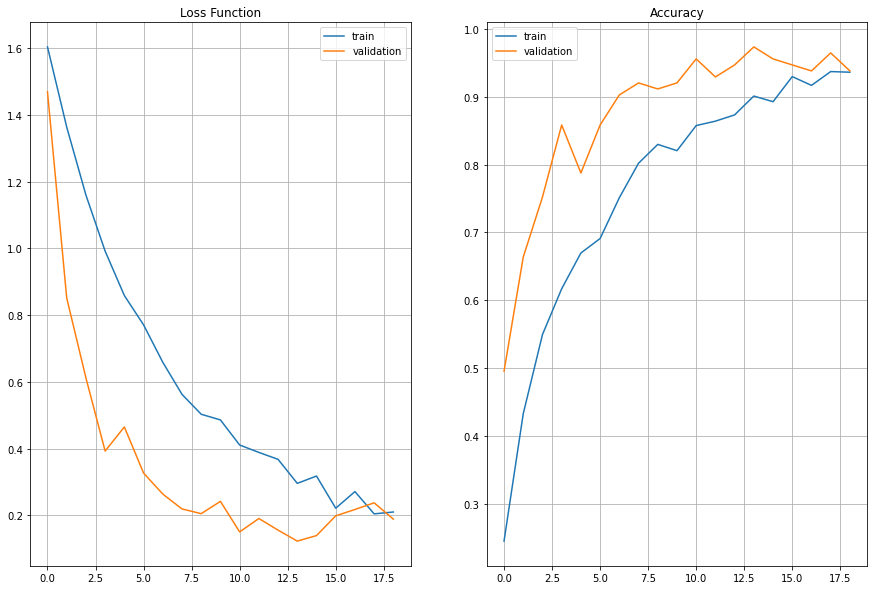

In [17]:
plt.figure(figsize=(15, 10))

# plot the loss function
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Function')
plt.grid(True)
plt.legend()

# and the accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.grid(True)
plt.title('Accuracy')
plt.legend()

plt.show()

In [18]:
results = model.evaluate(test_gen, batch_size=1)
print("test loss, test acc:", results)

 9/22 [===========>..................] - ETA: 8s - loss: 0.2352 - accuracy: 0.9097

C:\Users\Irfan\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  warnings.warn(


22/22 [==============================] - 13s 597ms/step - loss: 0.2855 - accuracy: 0.9072
test loss, test acc: [0.28545013070106506, 0.9072463512420654]


In [ ]:
a = []